In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [4]:
!ls

Mplot3d-bar-graph-supermarket-analytics.ipynb
Mplot3d-graph-workbook(Titanic-Dataset).ipynb
Superbowl-rating-viewership-by-year.ipynb
Supermarket-3D-visualization-using-function.ipynb
__pycache__
mplot3d_func.py


In [7]:
!cat mplot3d_func.py

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

def generate_3d_plot(dataFrame, col1, col2, col3, heading, color):
    sub_df = dataFrame[[col1,col2, col3]].dropna()
    sub_df[col1] = sub_df[col1].map(lambda x: 5*(x//5))
    sub_df[col2] = sub_df[col2].map(lambda x: 10*(x//10))

    dictionnaire = sub_df.groupby([col2, col1])[col3].count().to_dict()

    def get_count(i, j, dictionnaire):
        if (i,j) in list(dictionnaire.keys()):
            # (i,j) is a key
            return dictionnaire[(i,j)]
        else:
            return 0

    from mpl_toolkits.mplot3d import Axes3D

    # setup the figure and axes
    fig = plt.figure(figsize=(20, 20))

    ax = fig.add_subplot(111, projection='3d')
    _x = np.array([i[0] for i in list(dictionnaire.keys())])
    _y = np.array([i[1] for i in list(dictionnaire.keys())])

    np.random.shuffle(_x)
    np.random.shuffle(_y)

    _x = _x[:40]
    _y = _y[:40]

    _xx, _yy = np

## User the following to load the py file (only to see and edit if needed)
- %load mplot3d_func.py

In [20]:
# %load mplot3d_func.py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

def generate_3d_plot(dataFrame, col1, col2, col3, heading, color):
    sub_df = dataFrame[[col1,col2, col3]].dropna()
    sub_df[col1] = sub_df[col1].map(lambda x: 5*(x//5))
    sub_df[col2] = sub_df[col2].map(lambda x: 10*(x//10))

    dictionnaire = sub_df.groupby([col2, col1])[col3].count().to_dict()

    def get_count(i, j, dictionnaire):
        if (i,j) in list(dictionnaire.keys()):
            # (i,j) is a key
            return dictionnaire[(i,j)]
        else:
            return 0

    from mpl_toolkits.mplot3d import Axes3D

    # setup the figure and axes
    fig = plt.figure(figsize=(20, 20))

    ax = fig.add_subplot(111, projection='3d')
    _x = np.array([i[0] for i in list(dictionnaire.keys())])
    _y = np.array([i[1] for i in list(dictionnaire.keys())])

    np.random.shuffle(_x)
    np.random.shuffle(_y)

    _x = _x[:40]
    _y = _y[:40]

    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = np.array([get_count(i, j, dictionnaire) for i, j in zip(x, y)])
    bottom = np.zeros_like(top)
    width = 2 # 1..5 wider 3D vars
    depth = 2 
    
    ax.bar3d(x, y, bottom, width, depth, top, alpha=0.3, color=color)

    ax.set_title('3D Plot ' + heading + ' = f(' + col2 + ', ' +  col1 +' )', bbox={'facecolor':'lightblue', }, fontsize=24)
    ax.set_xlabel(col2, bbox={'facecolor':'lightblue', }, fontsize=18)
    ax.set_ylabel(col1, bbox={'facecolor':'lightblue', }, fontsize=18)
    ax.set_zlabel(col3, bbox={'facecolor':'lightblue', }, fontsize=18)
    
    #     ax.view_init(0, 0)
    # ax.view_init(azim=0, elev=90) # View from the Top

    
    plt.show()



In [21]:
import sys  
sys.path.insert(0, '..')
from mplot3d_func import generate_3d_plot 

## Data source: 
- https://www.sportsmediawatch.com/super-bowl-ratings-historical-viewership-chart-cbs-nbc-fox-abc/

In [22]:
remote_url = "https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/superbowl-ratings.csv"
dfs = pd.read_csv(remote_url, delimiter="\t")
dfs

,Year,Teams,Score,Network,OverallRating,TV-Viewers(M),Straming-Viewers(M),Spanish-Viewers,OOH,Ratings,Viewers
0,2021,TB-KC,TB +22,CBS,38.2,91.63,5.7M,647K,incl.,26.5,34.28M
1,2020,KC-SF,KC +11,FOX,41.6,100.45,3.4M,757K,13M,29.9,38.67M
2,2019,NE-LAR,NE +10,CBS,41.1,98.19,2.6M,473K,12M,31.0,39.95M
3,2018,PHI-NE,PHI +8,NBC,43.1,103.39,2.02M,543K,12M,33.4,43.00M
4,2017,NE-ATL,NE +6 (OT),FOX,45.3,111.32,1.72M,650K,—,37.1,47.62M
5,2016,DEN-CAR,DEN +14,CBS,46.6,111.86,1.40M,472K,—,37.7,47.86M
6,2015,NE-SEA,NE +4,NBC,47.5,114.44,973K,368K,—,39.1,49.71M
7,2014,SEA-DEN,SEA +35,FOX,46.7,112.19,531K,561K,—,39.3,49.87M
8,2013,BAL-SF,BAL +3,CBS,46.4,108.69,508K,—,—,39.7,50.22M
9,2012,NYG-NE,NYG +4,NBC,47.0,111.35,346K,—,—,40.5,51.84M


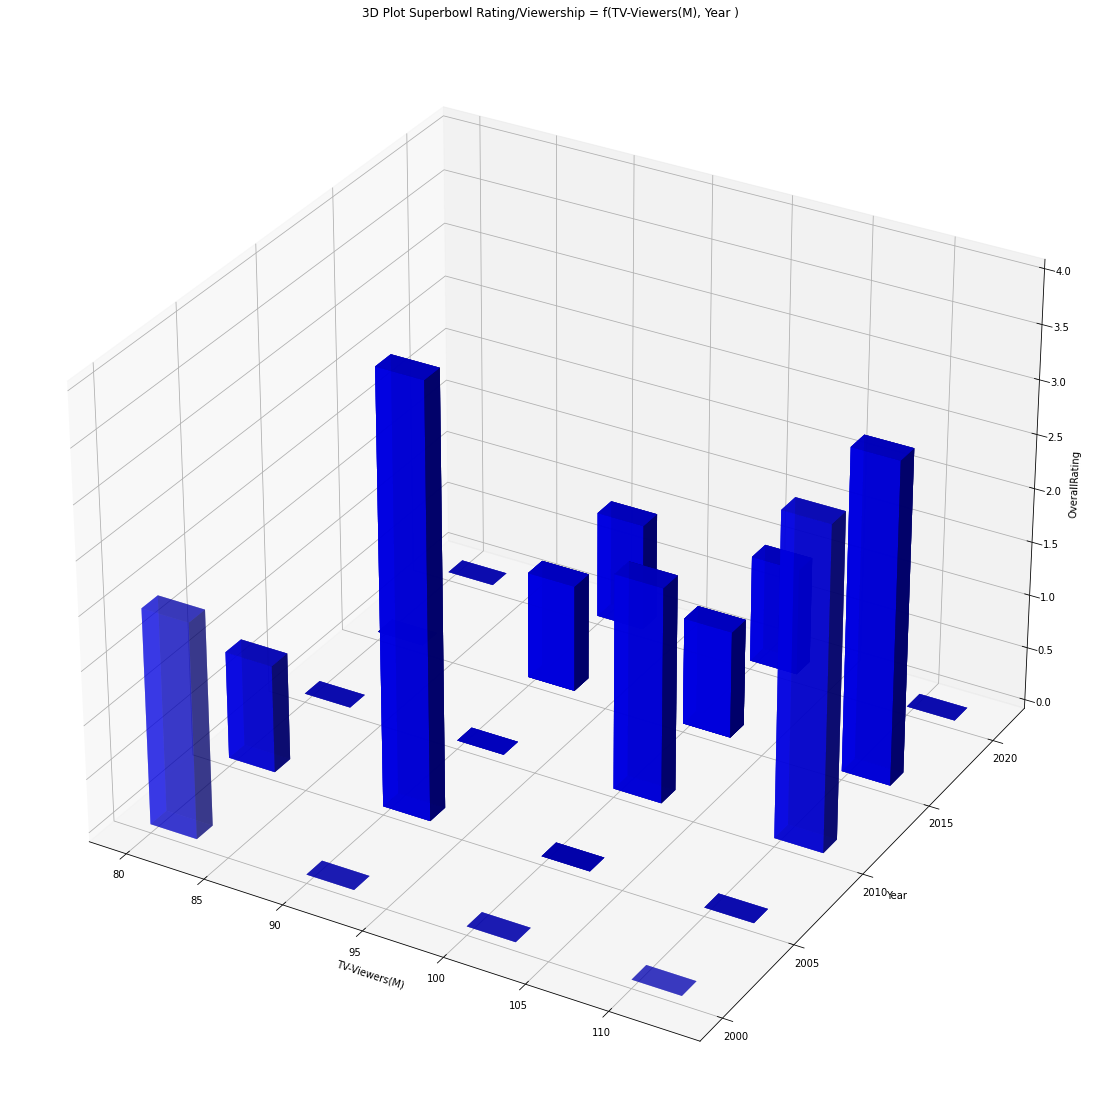

In [23]:
generate_3d_plot(dfs, 'Year', 'TV-Viewers(M)', 'OverallRating', 'Superbowl Rating/Viewership', 'blue')

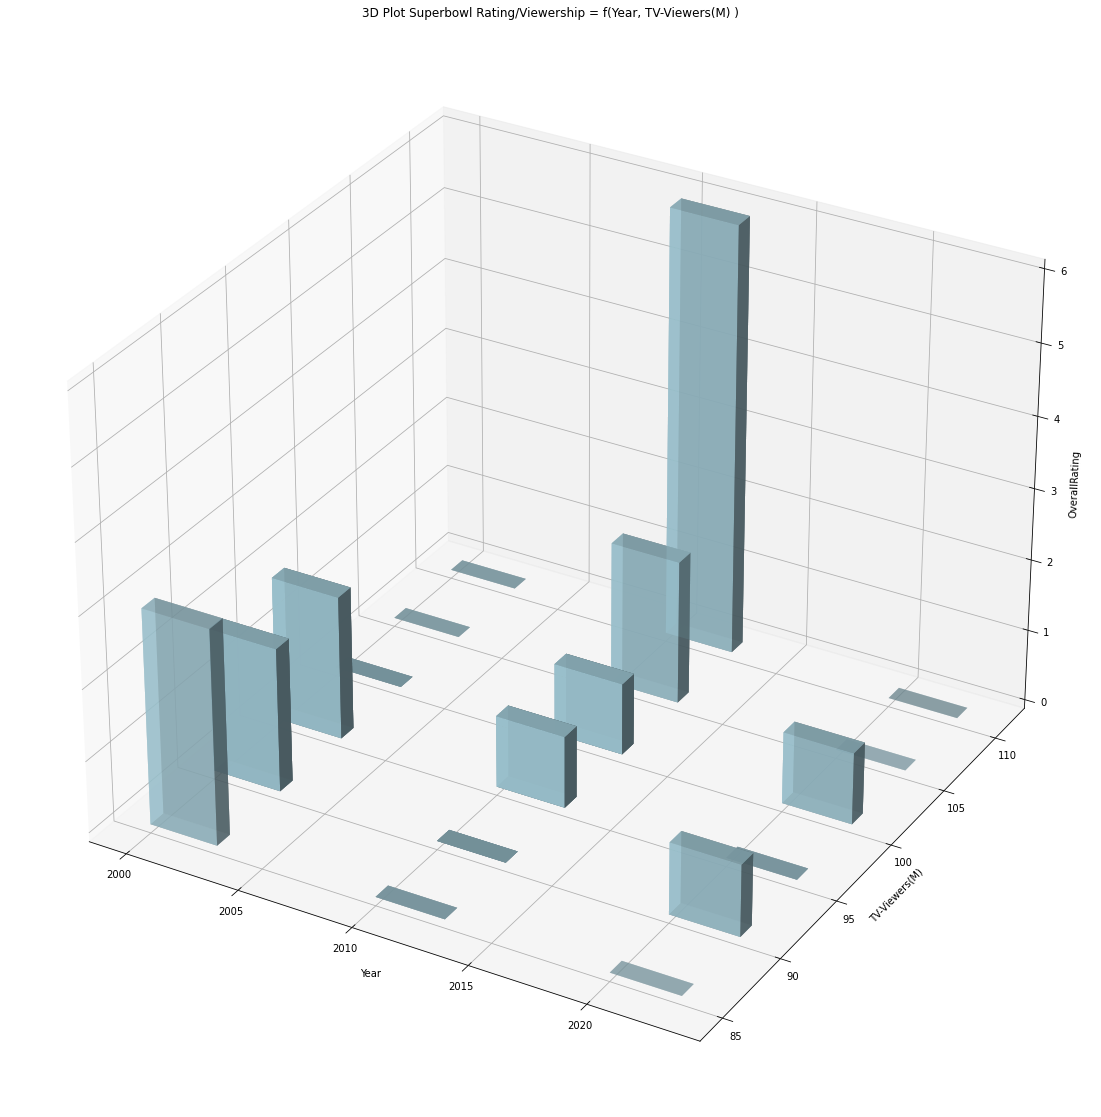

In [6]:
generate_3d_plot(dfs, 'TV-Viewers(M)', 'Year', 'OverallRating', 'Superbowl Rating/Viewership', 'lightblue')